In [1]:
import pandas as pd
import time

import json
import httplib2
import sys
import codecs
       
import re

import numpy as np
import math
import ast

import warnings
warnings.filterwarnings("ignore")

import json
#!pip install geog
import geog
import shapely.geometry
from shapely.geometry import Point

In [2]:
df = pd.read_csv('new_venues_clean.csv', encoding = "ISO-8859-1") 


In [3]:
df.drop(['in_the_box'],axis =1, inplace=True)

In [4]:
### Input
####### LA to SF (around 1204 POI)
x_0 = 34.05223
y_0 = -118.24368
x_f = 37.77493
y_f = -122.41942

####### San Jose to SD (around 1320 POI)
#x_0 = 37.3382082
#y_0 = -121.8863286
#x_f = 32.715738
#y_f = -117.1610838

# Oakland to SD  (around 1299 POI)
#x_0 = 37.8044
#y_0 = -122.2712
#x_f = 32.715738
#y_f = -117.1610838

# San Jose to SF (around 653 POI)
#x_0 = 37.3382082
#y_0 = -121.8863286
#x_f = 37.77493
#y_f = -122.41942

# Palo Alto to LA (around 872 POI)
#x_0 = 37.4419
#y_0 = -122.1430
#x_f = 34.05223
#y_f = -118.24368

# Berkeley to Santa Barbara (around 347 POI)
#x_0 = 37.8715926
#y_0 = -122.272747
#x_f =  34.420830
#y_f = -119.698189

# Berkeley to San Diego (around 1342 POI)
#x_0 = 37.8715926
#y_0 = -122.272747
#x_f =   32.715738
#y_f = -117.1610838

# Santa Cruz to LA (around 746 POI)
#x_0 = 36.974117
#y_0 = -122.030792
#x_f = 34.05223
#y_f = -118.24368

# Sacramento to SD (around  1149 POI)
#x_0 = 36.974117
#y_0 = -122.030792
#x_f =   32.715738
#y_f = -117.1610838

# Irvine to Big Sur (around  1038 POI)
#x_0 = 33.6846
#y_0 = -117.8265
#x_f =   36.3615
#y_f = -121.8563

print ("Origin Lat/Long", x_0, y_0)
print ("Destination Lat/Long", x_f, y_f)
#approximate distance between points (aka "radius")
radius = 160 # approximately 100 miles
print ("Radius", radius)

Origin Lat/Long 34.05223 -118.24368
Destination Lat/Long 37.77493 -122.41942
Radius 160


In [5]:
def poi_inside_box_optimize(x_0, y_0, x_f, y_f,df,radius=80):
        # Haversine distance from origin to Destination
        dlat = math.radians(x_f - x_0)
        dlon = math.radians(y_f - y_0)
        haversine_radius = 6371  # km
        a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(x_f)) \
            * math.cos(math.radians(x_0)) * math.sin(dlon / 2) * math.sin(dlon / 2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        haversine_dist = haversine_radius * c
        #print ('Haversine Distance between Origin and Destination', haversine_dist)

        if haversine_dist / radius < 2:
            no_of_points = 1
        else:
            no_of_points = round(haversine_dist / radius) - 1
        x_delta = (x_f - x_0) / no_of_points
        y_delta = (y_f - y_0) / no_of_points
        list_of_centroids = [(x_0 + i * x_delta, y_0 + i * y_delta) for i in range(1, no_of_points+1)]
         
        # list of tuples in the form of (x_min, x_max, y_min, y_max)
        polygon_height = radius * 1000  # meters
        polygon_points = 4
        angles = np.linspace(0, 360, polygon_points)

        df['in_the_box'] = False

        for (x, y) in list_of_centroids:
            df.loc[(abs(df["lat"]-x)<abs(x_delta/2)) & (abs(df["lng"]-y)<abs(y_delta/2)), 'in_the_box'] = True
            
        #print(df[df['in_the_box'] == True].shape[0])    
        return df

In [6]:
%%timeit
df1 = poi_inside_box_optimize(x_0,y_0,x_f,y_f,df,radius)

7.06 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
df[df['in_the_box'] == True]

In [7]:
df[df['in_the_box'] == True].shape

(1799, 19)

In [8]:
df_inside_the_box = df[df['in_the_box'] == True]

#### Logic to remove duplicate POIs

In [ ]:
df1[df1.duplicated(['name','address'], keep = 'first')]

In [ ]:
df1.shape

In [ ]:
df1.drop_duplicates(['name','address'], keep = 'first', inplace = True)

In [ ]:
df1.columns.values

In [ ]:
#df1.drop(['centroid_index'],axis =1, inplace=True)  

In [ ]:
df1.to_csv('new_venues_clean.csv')

#### Map the POIs

In [9]:
df_original = pd.read_csv('venues_clean_bucket.csv', encoding = "ISO-8859-1") 

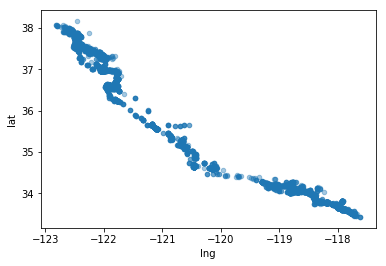

In [10]:
import matplotlib.pyplot as plt
df_original.plot(kind="scatter", x="lng", y="lat", alpha=0.4)
plt.show()

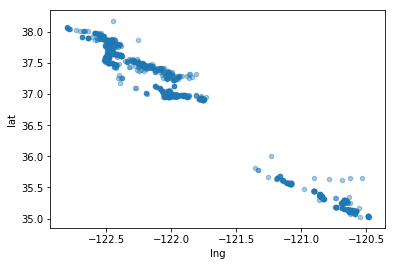

In [11]:
df_inside_the_box.plot(kind="scatter", x="lng", y="lat", alpha=0.4)
plt.show()